In [1]:
import sys, os

# ensure Python can see your MILP folder
sys.path.append(os.path.abspath("../"))  # one level up from your notebook

# now import the function
from MILP.distance_optimizer import optimize_shade_placement

!pip install geopandas rasterio contextily pulp shapely

import pandas as pd
import geopandas as gpd
import numpy as np
import contextily as cx
import matplotlib.pyplot as plt
from pulp import *



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/riyaduddalwar/CSCI461-ShadeLA/venv/lib/python3.13/site-packages/pulp/apis/../solverdir/cbc/osx/i64/cbc /var/folders/49/gghvbf593v11nxydkg74tv6c0000gn/T/46d1c62288684564a364dee0809fb15b-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/49/gghvbf593v11nxydkg74tv6c0000gn/T/46d1c62288684564a364dee0809fb15b-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 73599 COLUMNS
At line 295679 RHS
At line 369274 BOUNDS
At line 394028 ENDATA
Problem MODEL has 73594 rows, 24753 columns and 171939 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 8238.48 - 0.20 seconds
Cgl0004I processed model has 73594 rows, 24753 columns (24753 integer (24753 of which binary)) and 171939 elements
Cbc0038I Initial state - 101 integers unsatisfied sum - 45.9091
Cbc0038I Solution found of

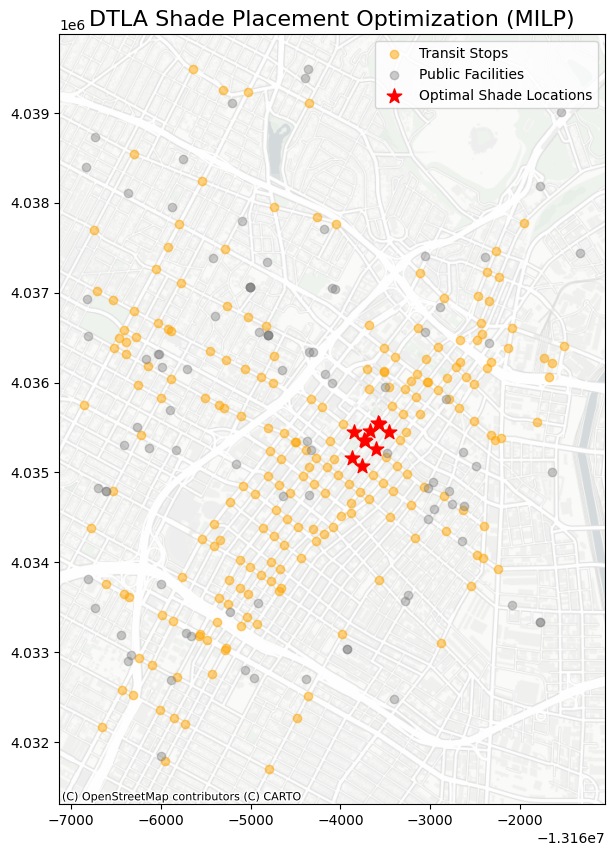

In [2]:
# --- Load DTLA data ---
bus_stops = gpd.read_file("../../461/data/bus_stops.geojson").to_crs(3857)
major_transit_stops_dtla = gpd.read_file("../../data/preprocessed/la_major_transit_stops_dtla.geojson").to_crs(3857)
schools_dtla = gpd.read_file("../../data/preprocessed/la_schools_dtla.geojson").to_crs(3857)
hospitals_dtla = gpd.read_file("../../data/preprocessed/la_hospitals_clinics_dtla.geojson").to_crs(3857)
food_dtla = gpd.read_file("../../data/preprocessed/la_food_assistance_dtla.geojson").to_crs(3857)

# --- Combine all public service facilities ---
public_points = gpd.GeoDataFrame(pd.concat(
    [schools_dtla[['geometry']], hospitals_dtla[['geometry']], food_dtla[['geometry']]],
    ignore_index=True), crs=schools_dtla.crs)

# --- Run the MILP optimizer ---
optimized_shades = optimize_shade_placement(
    candidate_points=major_transit_stops_dtla,
    public_points=public_points,
    max_shades=10,
    threshold=300
)

print(f"Selected {len(optimized_shades)} optimal shade sites.")

# --- Visualize ---
fig, ax = plt.subplots(figsize=(12, 10))
major_transit_stops_dtla.plot(ax=ax, color='orange', label='Transit Stops', alpha=0.5)
public_points.plot(ax=ax, color='gray', label='Public Facilities', alpha=0.4)
optimized_shades.plot(ax=ax, color='red', marker='*', markersize=120, label='Optimal Shade Locations')

cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels)
ax.legend()
ax.set_title("DTLA Shade Placement Optimization (MILP)", fontsize=16)
plt.show()
